In [32]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import sys

In [2]:
def unite(a, link):
    if link[a] == a:
        return a
    else:
        link[a] = unite(link[a], link)
        return link[a]

In [3]:
def unionSet(a, b, link):
    link[unite(a, link)] = unite(b, link)

In [51]:
def connComponents(img):
    next_label = 1;
    labelling = np.zeros(img.shape, dtype=int)
    link = [0]
    h, l = img.shape
    for row in range(h):
        for col in range(l):
            if img[row, col] != 0:
                neighbours = []
                if row > 0:
                    if img[row-1][col] == img[row, col]: neighbours.append((row-1, col))
                if col > 0:
                    if (img[row, col-1] == img[row, col]):  neighbours.append((row, col-1))
                if row > 0 and col > 0:
                    if img[row-1, col-1] == img[row, col]: neighbours.append((row-1, col-1)) 
                if row > 0 and col + 1 < img.shape[1]:
                    if img[row-1, col+1] == img[row, col]: neighbours.append((row-1, col+1))
                       
                if len(neighbours) == 0:
                    labelling[row, col] = next_label
                    link.append(next_label)
                    next_label += 1
                
                else:
                    L = [labelling[r, c] for r, c in neighbours]
                    labelling[row, col] = min(L)
                    for label in L:
                        unionSet(label, labelling[row, col], link)
                        
    for row in range(h):
        for col in range(l):
            if img[row, col] != 0:
                labelling[row, col] = unite(labelling[row, col], link)
    return labelling

In [52]:
def convert_fg_bg(img):
  fimg=img.copy()
  for i in range(img.shape[0]):
    for j in range(img.shape[1]):
      if(img[i][j]<125):
        fimg[i][j]=0
      else:
        fimg[i][j]=1
  return fimg

[0 1]


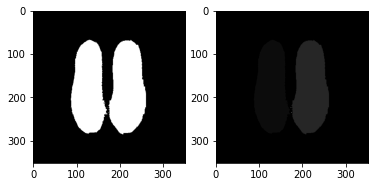

In [56]:
img1 = cv2.imread("/content/iiit-test-image1.png",0)
fimg = convert_fg_bg(img1)
plt.subplot(1,2,1)
print(np.unique(fimg))
plt.imshow(fimg, cmap="gray")
plt.subplot(1,2,2)
cimg = connComponents(fimg)
vals,cnts=np.unique(cimg, return_counts=True)
plt.imshow(cimg, cmap="gray")

In [76]:
boxes=[]
# print(vals,cnts)
# print(fimg.shape)
for v in range(len(vals)):
  val=vals[v]
  if(val==0 or cnts[v]<10):
    continue
  box=[]
  min_x=fimg.shape[0]
  min_y=fimg.shape[1]
  max_y=0
  max_x=0
  ff=0
  for i in range(fimg.shape[0]):
    for j in range(fimg.shape[1]):
      if(cimg[i][j]==val):
        min_x=min(min_x,i)
        min_y=min(min_y,j)
        max_x=max(max_x,i)
        max_y=max(max_y,j)
        ff+=1
  # print(min_x,max_x,min_y,max_y,val,ff)
  cx=int((min_x+max_x)/2)
  cy=int((min_y+max_y)/2)
  w=max_x-min_x
  h=max_y-min_y
  boxes.append([cx,cy,w,h])
print(boxes)



[[176, 128, 216, 83], [177, 216, 216, 86]]


[0 1]


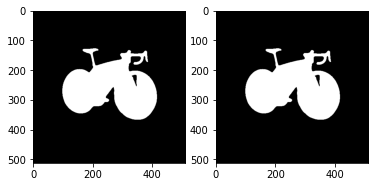

In [77]:
img2 = cv2.imread("/content/iiit-test-image2.png",0)
fimg2 = convert_fg_bg(img2)
plt.subplot(1,2,1)
print(np.unique(fimg2))
plt.imshow(fimg2, cmap="gray")
plt.subplot(1,2,2)
cimg2 = connComponents(fimg2)
vals2,cnts2=np.unique(cimg2, return_counts=True)
plt.imshow(cimg2, cmap="gray")

In [78]:
boxes=[]
# print(vals2,cnts2)
# print(fimg2.shape)
for v in range(len(vals2)):
  val=vals2[v]
  if(val==0 or cnts2[v]<10):
    continue
  box=[]
  min_x=fimg2.shape[0]
  min_y=fimg2.shape[1]
  max_y=0
  max_x=0
  for i in range(fimg2.shape[0]):
    for j in range(fimg2.shape[1]):
      if(cimg2[i][j]==val):
        min_x=min(min_x,i)
        min_y=min(min_y,j)
        max_x=max(max_x,i)
        max_y=max(max_y,j)
  # print(min_x,max_x,min_y,max_y,val)
  cx=int((min_x+max_x)/2)
  cy=int((min_y+max_y)/2)
  w=max_x-min_x
  h=max_y-min_y
  boxes.append([cx,cy,w,h])
print(boxes)


[[247, 256, 238, 316]]
